In [111]:
import nsfg
import thinkplot
import thinkstats2
import numpy as np
df = nsfg.ReadFemPreg()



In [112]:
df['total_birthwgt_oz'] = df.birthwgt_lb * 16 + df.birthwgt_oz
df = df.dropna(subset = ['total_birthwgt_oz', 'agepreg' ])
age = df.agepreg


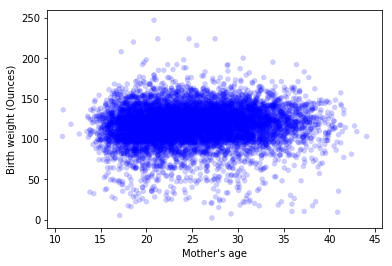

<Figure size 576x432 with 0 Axes>

In [130]:
thinkplot.Scatter(age, df.total_birthwgt_oz, alpha=0.2)
thinkplot.Config(legend=None)
thinkplot.Show(xlabel="Mother's age",
ylabel='Birth weight (Ounces)')


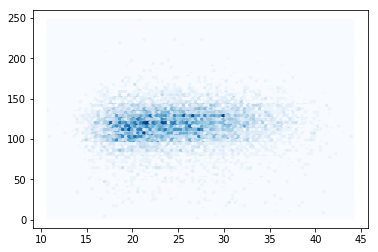

In [114]:
thinkplot.HexBin(age, df.total_birthwgt_oz)


In [115]:
bins = np.arange(10, 45, 2)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)


In [116]:
ages = [group.agepreg.mean() for i, group in groups][2:-2]
cdfs = [thinkstats2.Cdf(group.total_birthwgt_oz) for i, group in groups][2:-2]

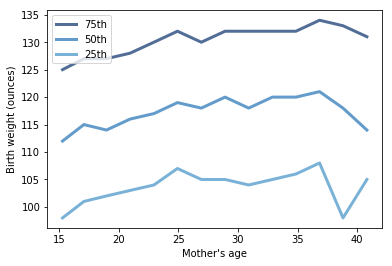

In [126]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label =  '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)

thinkplot.Config(xlabel="Mother's age",
                     ylabel='Birth weight (ounces)',
                      legend=True)

In [118]:
pearsons = np.corrcoef(df.total_birthwgt_oz, age)
pearsons

array([[1.        , 0.06883397],
       [0.06883397, 1.        ]])

The Pearson's correlation coefficient, or the normalized covariance, is 0.07, which is a weak correlation. 

In [119]:
wgt_rank = df.total_birthwgt_oz.rank()
age_rank = age.rank()
spearmans = np.corrcoef(wgt_rank, age_rank)
spearmans

array([[1.        , 0.09461004],
       [0.09461004, 1.        ]])

The Spearman's rank correlation is .09, which is slightly higher than Pearson's but very weak. 

The relationship between birth weight and mother's age appears to be weak. When plotting the points, the points are very scattered and appear to have 0 slope. While birth weights seem to rise steadily between the ages of 15 and 25, the trend seems to weaken in older age. The Pearson and Spearman correlations also support this claim. 